#Configurando o Scrapy

Os spiders possuem esse padrão, mudaremos apenas o nome do spider e o link da página para se adequar a categoria dos produtos desejados:

In [ ]:
#class InformaticaSpider(scrapy.Spider):
    #name = "informatica"
    #start_urls = [f"https://www.mercadolivre.com.br/ofertas?container_id=MLB779362-1&category=MLB1648&page={i}" for i in range(1,8)]

    #def parse(self, response, **kwargs):
        #for i in response.xpath('.//li[@class="promotion-item"]'):
          #nome = i.xpath('.//p[@class="promotion-item__title"]/text()').get()
          #yield{
            #'nome': nome
          #}

Alteramos as variaveis do arquivo settings do projeto do scrapy para os valores correspondentes abaixo:

In [ ]:
#ROBOTSTXT_OBEY = False
#AUTOTHROTTLE_ENABLED = True
#USER_AGENT = 'seu user_agent'

In [ ]:
#Conecta o Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import shutil

In [ ]:
!pip install scrapy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.1/290.1 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.8/247.8 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.6/97.6 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 8.9 MB/s eta 0:00:00


In [ ]:
!scrapy startproject mercadolivre

New Scrapy project 'mercadolivre', using template directory '/usr/local/lib/python3.10/dist-packages/scrapy/templates/project', created in:
    /content/mercadolivre

You can start your first spider with:
    cd mercadolivre
    scrapy genspider example example.com


In [ ]:
%cd mercadolivre

/content/mercadolivre


###Spider para os produtos de informatica

In [ ]:
!scrapy genspider informatica mercadolivre.com

In [ ]:
!scrapy crawl informatica -o informatica.json

In [ ]:
#Caminho temporário onde o arquivo JSON será salvo no Colab
temp_file_path = '/content/mercadolivre/mercadolivre/informatica.json'

#Caminho onde o arquivo será salvo no Google Drive
destination_path = '/content/drive/My Drive/dataset_produtosT/informatica.json'

In [ ]:
#Copia o arquivo para o Google Drive
shutil.copy(temp_file_path, destination_path)
print(f'Arquivo salvo em: {destination_path}')

###Spider para os produtos eletrodomesticos

In [ ]:
!scrapy genspider eletrodomesticos mercadolivre.com

In [ ]:
!scrapy crawl eletrodomesticos -o eletrodomesticos.json

In [ ]:
#Caminho temporário onde o arquivo JSON será salvo no Colab
temp_file_path = '/content/mercadolivre/mercadolivre/eletrodomesticos.json'

#Caminho onde o arquivo será salvo no Google Drive
destination_path = '/content/drive/My Drive/dataset_produtosT/eletrodomesticos.json'

In [ ]:
#Copia o arquivo para o Google Drive
shutil.copy(temp_file_path, destination_path)
print(f'Arquivo salvo em: {destination_path}')

###Spider para os produtos celulares/telefones

In [ ]:
!scrapy genspider celulares_telefones mercadolivre.com

In [ ]:
!scrapy crawl celulares_telefones -o celulares_telefones.json

In [ ]:
#Caminho temporário onde o arquivo JSON será salvo no Colab
temp_file_path = '/content/mercadolivre/mercadolivre/celulares_telefones.json'

#Caminho onde o arquivo será salvo no Google Drive
destination_path = '/content/drive/My Drive/dataset_produtosT/celulares_telefones.json'

In [ ]:
#Copia o arquivo para o Google Drive
shutil.copy(temp_file_path, destination_path)
print(f'Arquivo salvo em: {destination_path}')

#Preparando os dados

In [ ]:
import json
import os

#Caminho para os arquivos JSON
data_path = '/content/drive/My Drive/dataset_produtosT'

#Função para carregar dados de um arquivo JSON
def load_data(filename):
    with open(filename, 'r') as f:
        return json.load(f)

In [ ]:
#Carrega os dados
informatica = load_data(os.path.join(data_path, 'informatica.json'))
eletrodomesticos = load_data(os.path.join(data_path, 'eletrodomesticos.json'))
celulares = load_data(os.path.join(data_path, 'celular_telefones.json'))

#Unifica os dados em uma lista com labels
data = []
for item in informatica:
    data.append({'nome': item['nome'], 'categoria': 'informática'})
for item in eletrodomesticos:
    data.append({'nome': item['nome'], 'categoria': 'eletrodomésticos'})
for item in celulares:
    data.append({'nome': item['nome'], 'categoria': 'celulares'})

print(f"Total de produtos: {len(data)}")

Total de produtos: 1103


In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame(data)
df.head()

,nome,categoria
0,Leitor Código De Barras S/fio Wireless Laser B...,informática
1,Notebook Lenovo V14 Amd R5 8gb 256gb Ssd W11 H...,informática
2,Caneta Pencil Wb Compatível C/ iPad Com Palm R...,informática
3,Estabilizador Ts Shara Powerest Home 1000 Bivo...,informática
4,Teclado Gamer Semi Mecânico Led Rgb Abnt2 Usb ...,informática


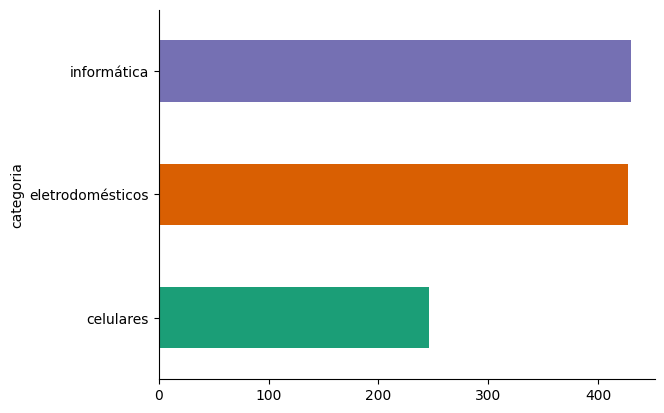

In [ ]:
# @title categoria

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('categoria').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
from sklearn.model_selection import train_test_split

#Divide os dados em treino, validação e teste
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.1, random_state=42)

print(f"Treino: {len(train_data)}, Validação: {len(val_data)}, Teste: {len(test_data)}")

Treino: 793, Validação: 89, Teste: 221


#Treinando e Avaliando o Distilbert

In [ ]:
#Instala pacotes necessários para o treinamento
!pip install transformers[torch]
!pip install accelerate -U
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.4/309.4 kB 5.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from transformers import DataCollatorWithPadding
from datasets import Dataset

model_name = "distilbert-base-uncased"

#Carrega o tokenizer e o modelo
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=3)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
#Mapea as categorias para labels
category_to_label = {
    'informática': 0,
    'eletrodomésticos': 1,
    'celulares': 2
}

def add_labels(examples):
    examples['label'] = category_to_label[examples['categoria']]
    return examples

#Adiciona rótulos aos datasets
train_dataset = Dataset.from_list(train_data).map(add_labels)
val_dataset = Dataset.from_list(val_data).map(add_labels)
test_dataset = Dataset.from_list(test_data).map(add_labels)

Map:   0%|          | 0/793 [00:00<?, ? examples/s]

Map:   0%|          | 0/89 [00:00<?, ? examples/s]

Map:   0%|          | 0/221 [00:00<?, ? examples/s]

In [ ]:
#Função para tokenizar os dados
def tokenize_function(examples):
    return tokenizer(examples['nome'], truncation=True)

train_dataset = train_dataset.map(tokenize_function, batched=True)
val_dataset = val_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)

#Remove colunas desnecessárias e definir a coluna de rótulo
train_dataset = train_dataset.remove_columns(['nome', 'categoria']).with_format("torch")
val_dataset = val_dataset.remove_columns(['nome', 'categoria']).with_format("torch")
test_dataset = test_dataset.remove_columns(['nome', 'categoria']).with_format("torch")

Map:   0%|          | 0/793 [00:00<?, ? examples/s]

Map:   0%|          | 0/89 [00:00<?, ? examples/s]

Map:   0%|          | 0/221 [00:00<?, ? examples/s]

In [ ]:
#Prepara o data collator
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

#Configurações do treinamento
training_args = TrainingArguments(
    output_dir='./results',
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    save_total_limit=1,
    logging_dir='./logs',
    logging_steps=10
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
#Função para calcular as métricas
def compute_metrics(p):
    from sklearn.metrics import accuracy_score, precision_recall_fscore_support
    preds = p.predictions.argmax(-1)
    labels = p.label_ids
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1, "precision": precision, "recall": recall}

In [ ]:
#Criando o trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics
)

In [ ]:
#Treina o modelo
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.457700,0.379035,0.910112,0.907072,0.910680,0.910112
2,0.246900,0.226966,0.932584,0.932584,0.933573,0.932584
3,0.165500,0.168780,0.943820,0.943539,0.943559,0.943820


TrainOutput(global_step=150, training_loss=0.3906777199109395, metrics={'train_runtime': 629.2319, 'train_samples_per_second': 3.781, 'train_steps_per_second': 0.238, 'total_flos': 26296282483272.0, 'train_loss': 0.3906777199109395, 'epoch': 3.0})

In [ ]:
#Avalia no conjunto de teste
test_results = trainer.evaluate(eval_dataset=test_dataset)
print(test_results)

#Predições no conjunto de teste
predictions = trainer.predict(test_dataset)
preds = predictions.predictions.argmax(-1)

#Relatório de classificação
from sklearn.metrics import classification_report

labels = test_dataset['label']
print(classification_report(labels, preds, target_names=['informática', 'eletrodomésticos', 'celulares']))


{'eval_loss': 0.17561548948287964, 'eval_accuracy': 0.9457013574660633, 'eval_f1': 0.9452867043968266, 'eval_precision': 0.9452393122352899, 'eval_recall': 0.9457013574660633, 'eval_runtime': 15.4352, 'eval_samples_per_second': 14.318, 'eval_steps_per_second': 0.907, 'epoch': 3.0}
                  precision    recall  f1-score   support

     informática       0.94      0.92      0.93        88
eletrodomésticos       0.97      1.00      0.98        86
       celulares       0.91      0.89      0.90        47

        accuracy                           0.95       221
       macro avg       0.94      0.94      0.94       221
    weighted avg       0.95      0.95      0.95       221



#Testando o modelo o Distilbert

In [ ]:
# Testar o modelo com alguns exemplos
def classify_product(product_name):
    inputs = tokenizer(product_name, return_tensors="pt", truncation=True)
    outputs = model(**inputs)
    predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
    predicted_label = torch.argmax(predictions, dim=1).item()
    return label_to_category[predicted_label]

def test_model():
    test_products = ["Laptop Dell Inspiron", "Geladeira Brastemp", "Smartphone Apple iPhone 12"]
    for product in test_products:
        category = classify_product(product)
        print(f'O produto "{product}" pertence à categoria: {category}')

test_model()

O produto "Laptop Dell Inspiron" pertence à categoria: informática
O produto "Geladeira Brastemp" pertence à categoria: eletrodomésticos
O produto "Smartphone Apple iPhone 12" pertence à categoria: celulares


#Salvando o Distilbert

In [ ]:
save_path = '/content/drive/My Drive/modelo_treinadoDistilbert'  #Caminho para salvar o modelo

In [ ]:
# Salvar o melhor modelo no Google Drive
model.save_pretrained(save_path)
tokenizer.save_pretrained(save_path)

('/content/drive/My Drive/modelo_treinadoDistilbert/tokenizer_config.json',
 '/content/drive/My Drive/modelo_treinadoDistilbert/special_tokens_map.json',
 '/content/drive/My Drive/modelo_treinadoDistilbert/vocab.txt',
 '/content/drive/My Drive/modelo_treinadoDistilbert/added_tokens.json',
 '/content/drive/My Drive/modelo_treinadoDistilbert/tokenizer.json')

#Treinando e Avaliando o Bert

In [ ]:
model_name = "bert-base-uncased"

#Carrega o tokenizer e o modelo
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=3)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
#Mapeamea as categorias para labels
category_to_label = {
    'informática': 0,
    'eletrodomésticos': 1,
    'celulares': 2
}

def add_labels(examples):
    examples['label'] = category_to_label[examples['categoria']]
    return examples

#Adiciona rótulos aos datasets
train_dataset = Dataset.from_list(train_data).map(add_labels)
val_dataset = Dataset.from_list(val_data).map(add_labels)
test_dataset = Dataset.from_list(test_data).map(add_labels)

Map:   0%|          | 0/793 [00:00<?, ? examples/s]

Map:   0%|          | 0/89 [00:00<?, ? examples/s]

Map:   0%|          | 0/221 [00:00<?, ? examples/s]

In [ ]:
#Função para tokenizar os dados
def tokenize_function(examples):
    return tokenizer(examples['nome'], truncation=True)

train_dataset = train_dataset.map(tokenize_function, batched=True)
val_dataset = val_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)

#Remove as colunas desnecessárias e definir a coluna de rótulo
train_dataset = train_dataset.remove_columns(['nome', 'categoria']).with_format("torch")
val_dataset = val_dataset.remove_columns(['nome', 'categoria']).with_format("torch")
test_dataset = test_dataset.remove_columns(['nome', 'categoria']).with_format("torch")

Map:   0%|          | 0/793 [00:00<?, ? examples/s]

Map:   0%|          | 0/89 [00:00<?, ? examples/s]

Map:   0%|          | 0/221 [00:00<?, ? examples/s]

In [ ]:
#Prepara o data collator
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

#Configurações do treinamento
training_args = TrainingArguments(
    output_dir='./results',
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    save_total_limit=1,
    logging_dir='./logs',
    logging_steps=10
)

In [ ]:
#Função para calcular as métricas
def compute_metrics(p):
    from sklearn.metrics import accuracy_score, precision_recall_fscore_support
    preds = p.predictions.argmax(-1)
    labels = p.label_ids
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1, "precision": precision, "recall": recall}

In [ ]:
#Criando o trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics
)

In [ ]:
#Treina o modelo
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.445900,0.407195,0.910112,0.909327,0.913625,0.910112
2,0.265900,0.281512,0.910112,0.910112,0.910112,0.910112
3,0.196200,0.233507,0.932584,0.932022,0.933279,0.932584


TrainOutput(global_step=150, training_loss=0.3879868753751119, metrics={'train_runtime': 1178.9401, 'train_samples_per_second': 2.018, 'train_steps_per_second': 0.127, 'total_flos': 52230068992584.0, 'train_loss': 0.3879868753751119, 'epoch': 3.0})

In [ ]:
#Avalia no conjunto de teste
test_results = trainer.evaluate(eval_dataset=test_dataset)
print(test_results)

#Predições no conjunto de teste
predictions = trainer.predict(test_dataset)
preds = predictions.predictions.argmax(-1)

#Relatório de classificação
from sklearn.metrics import classification_report

labels = test_dataset['label']
print(classification_report(labels, preds, target_names=['informática', 'eletrodomésticos', 'celulares']))

{'eval_loss': 0.1663801670074463, 'eval_accuracy': 0.9502262443438914, 'eval_f1': 0.9499117215351196, 'eval_precision': 0.9518805461151285, 'eval_recall': 0.9502262443438914, 'eval_runtime': 30.5769, 'eval_samples_per_second': 7.228, 'eval_steps_per_second': 0.458, 'epoch': 3.0}
                  precision    recall  f1-score   support

     informática       0.92      0.95      0.94        88
eletrodomésticos       0.96      0.99      0.97        86
       celulares       1.00      0.87      0.93        47

        accuracy                           0.95       221
       macro avg       0.96      0.94      0.95       221
    weighted avg       0.95      0.95      0.95       221



#Testando o modelo o Bert

In [ ]:
# Testar o modelo com alguns exemplos
def classify_product(product_name):
    inputs = tokenizer(product_name, return_tensors="pt", truncation=True)
    outputs = model(**inputs)
    predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
    predicted_label = torch.argmax(predictions, dim=1).item()
    return label_to_category[predicted_label]

def test_model():
    test_products = ["Laptop Dell Inspiron", "Geladeira Brastemp", "Smartphone Apple iPhone 12"]
    for product in test_products:
        category = classify_product(product)
        print(f'O produto "{product}" pertence à categoria: {category}')

test_model()

O produto "Laptop Dell Inspiron" pertence à categoria: informática
O produto "Geladeira Brastemp" pertence à categoria: eletrodomésticos
O produto "Smartphone Apple iPhone 12" pertence à categoria: celulares


#Salvando o Bert

In [ ]:
save_path = '/content/drive/My Drive/modelo_treinadoBert'  #Caminho para salvar o modelo

In [ ]:
# Salvar o melhor modelo no Google Drive
model.save_pretrained(save_path)
tokenizer.save_pretrained(save_path)

('/content/drive/My Drive/modelo_treinadoBert/tokenizer_config.json',
 '/content/drive/My Drive/modelo_treinadoBert/special_tokens_map.json',
 '/content/drive/My Drive/modelo_treinadoBert/vocab.txt',
 '/content/drive/My Drive/modelo_treinadoBert/added_tokens.json',
 '/content/drive/My Drive/modelo_treinadoBert/tokenizer.json')

#Fontes utilizadas durante o trabalho

https://www.youtube.com/watch?v=QdLgNr1mKQU&t=723s

https://huggingface.co/transformers/v4.10.1/custom_datasets.html

https://www.youtube.com/watch?v=V1-Hm2rNkik&t=640s